## Visualizing Geographic Data in Python


- Read in the 3 CSV files into 3 separate dataframe objects - airlines, airports, and routes.
- Use the DataFrame.iloc[] method to return the first row in each dataframe as a neat table.
- Display the first rows for all dataframes using the print() function

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
routes = pd.read_csv("routes.csv")

print(airlines.head(0))
print(airports.head(0))
print(routes.head(0))

Empty DataFrame
Columns: [id, name, alias, iata, icao, callsign, country, active]
Index: []
Empty DataFrame
Columns: [id, name, city, country, code, icao, latitude, longitude, altitude, offset, dst, timezone]
Index: []
Empty DataFrame
Columns: [airline, airline_id, source, source_id, dest, dest_id, codeshare, stops, equipment]
Index: []


- Create a new basemap instance with the following parameters:
    - projection: "merc"
    - llcrnrlat: -80 degrees
    - urcrnrlat: 80 degrees
    - llcrnrlon: -180 degrees
    - urcrnrlon: 180 degrees
- Assign the instance to the new variable m.

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

m = Basemap(projection="merc", llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)

- Convert the longitude values from spherical to Cartesian and assign the resulting list to x.
- Convert the latitude values from spherical to Cartesian and assign the resulting list to y.

In [4]:
longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()

x, y = m(longitudes, latitudes)

- Create a scatter plot using the converted latitude and longitude values using a marker size of 1.
- Display the scatter plot.

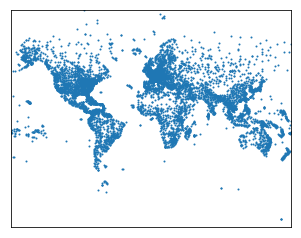

In [5]:
m.scatter(x, y, s=1)
plt.show()

- Use basemap.drawcoastlines() to enable the coast lines to be displayed.
- Display the plot using plt.show().

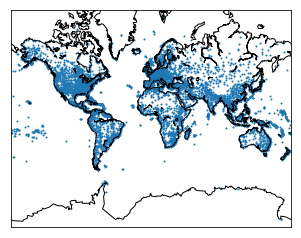

In [6]:
m.scatter(x, y, s=1)
m.drawcoastlines()
plt.show()

- Before creating the basemap instance and generating the scatter plot, add code that:
    - creates a figure with a height of 15 inches and a width of 20 inches
    - sets the title of the scatter plot to "Scaled Up Earth With Coastlines"

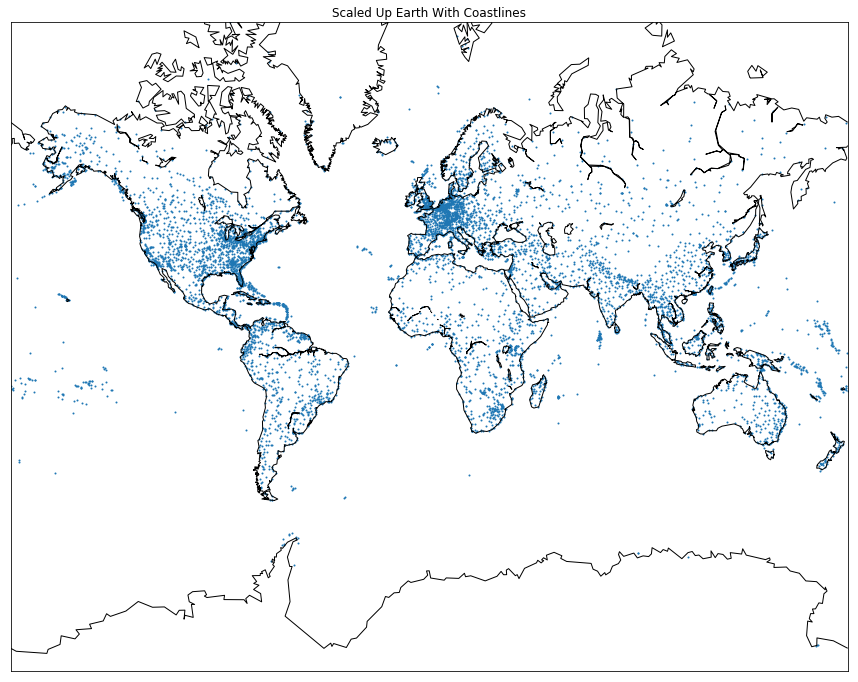

In [7]:
fig, ax = plt.subplots(figsize=(15, 20))
plt.title("Scaled Up Earth With Coastlines")
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()
x, y = m(longitudes, latitudes)
m.scatter(x, y, s=1)
m.drawcoastlines()
plt.show()

- Read geo_routes.csv into a dataframe named geo_routes.
- Use the DataFrame.info() method to look for columns containing any null values.
- Display the first five rows in geo_routes.

In [8]:
geo_routes = pd.read_csv("geo_routes.csv")
geo_routes.info()
print(geo_routes.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
airline      67428 non-null object
source       67428 non-null object
dest         67428 non-null object
equipment    67410 non-null object
start_lon    67428 non-null float64
end_lon      67428 non-null float64
start_lat    67428 non-null float64
end_lat      67428 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB
  airline source dest equipment  start_lon    end_lon  start_lat    end_lat
0      2B    AER  KZN       CR2  39.956589  49.278728  43.449928  55.606186
1      2B    ASF  KZN       CR2  48.006278  49.278728  46.283333  55.606186
2      2B    ASF  MRV       CR2  48.006278  43.081889  46.283333  44.225072
3      2B    CEK  KZN       CR2  61.503333  49.278728  55.305836  55.606186
4      2B    CEK  OVB       CR2  61.503333  82.650656  55.305836  55.012622


- Write a function, named create_great_circles() that draws a great circle for each route that has an absolute difference in the latitude and longitude values less than 180. This function should:
    - Accept a dataframe as the sole parameter
    - Iterate over the rows in the dataframe using DataFrame.iterrows()
    - For each row:
        - Draw a great circle using the four geographic coordinates only if:
            - The absolute difference between the latitude values (end_lat and start_lat) is less than 180.
            - If the absolute difference between the longitude values (end_lon and start_lon) is less than 180.
- Create a filtered dataframe containing just the routes that start at the DFW airport.
    - Select only the rows in geo_routes where the value for the source column equals "DFW".
    - Assign the resulting dataframe to dfw.
- Pass dfw into create_great_circles() and display the plot using the pyplot.show() function.

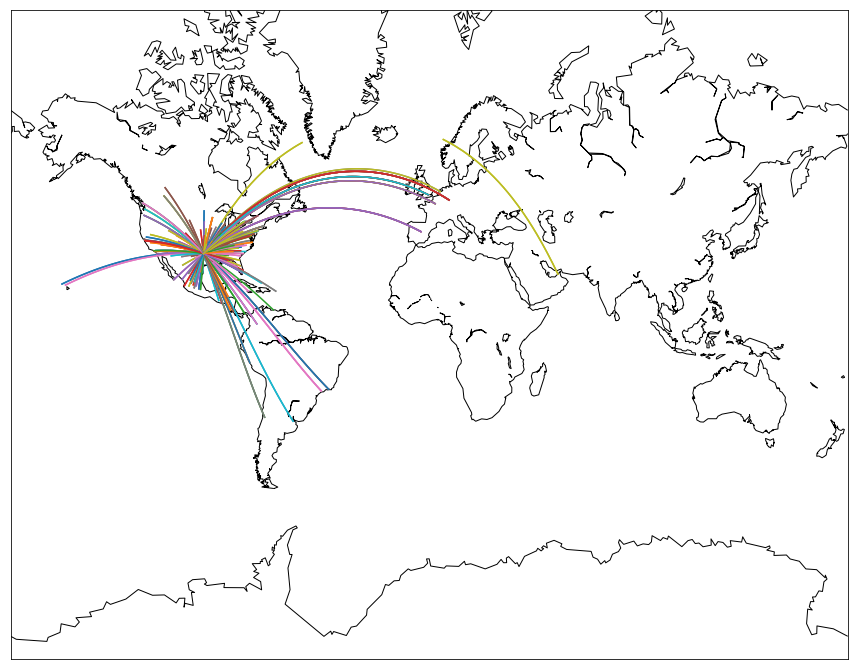

In [9]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

def create_great_circles(input_df):
    for idx, row in input_df.iterrows():
        start_lat, start_lon = row["start_lat"], row["start_lon"]
        end_lat, end_lon = row["end_lat"], row["end_lon"]

        if abs(end_lat-start_lat) < 180 and abs(end_lon-start_lon) < 180:
            m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat)
      
dfw = geo_routes[geo_routes["source"]=="DFW"]
create_great_circles(dfw)
plt.show()